In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only directory
import os
for dirname, _, filenames in os.walk('/CropDisease'):
    for filename in filenames:
        pass


In [73]:
directory = 'CropDisease'

In [74]:
import os
print(os.listdir(directory))
#list of files and directories 

['Invalid', 'Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight', 'Rice_Brown_Spot', 'Rice_Healthy', 'Rice_Hispa', 'Rice_Leaf_Blast', 'train', 'valid', 'validation']


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
#subdirectories of a main directory, with one subdirectory per class

In [61]:
#Total class label in dataset
print("Total number of class labels :")
len(os.listdir('CropDisease'))

Total number of class labels :


11

In [62]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)

In [63]:
dataset = image_dataset_from_directory(directory,
                                       shuffle=True,
                                       label_mode = 'categorical',
                                       batch_size=BATCH_SIZE,
                                       seed = 42,
                                       image_size=IMG_SIZE)

Found 1902 files belonging to 11 classes.


In [64]:
# Printing class labels
class_names = dataset.class_names
num_classes = len(class_names)
print("The list of all class label names:")

for i in range(1, num_classes + 1):
    print(str(i) + ". ", class_names[i - 1])

The list of all class label names:
1.  Invalid
2.  Potato___Early_Blight
3.  Potato___Healthy
4.  Potato___Late_Blight
5.  Rice_Brown_Spot
6.  Rice_Healthy
7.  Rice_Hispa
8.  Rice_Leaf_Blast
9.  train
10.  valid
11.  validation


In [65]:
category_count = []

for root, dirs, files in os.walk(directory):
    for dir_path in dirs:
        category_count.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

In [66]:
count_df = pd.DataFrame(category_count, columns=['Category', 'Count'])
count_df

Category  Count
0                 Invalid    273
1   Potato___Early_Blight    250
2        Potato___Healthy    250
3    Potato___Late_Blight    250
4         Rice_Brown_Spot    250
5            Rice_Healthy    338
6              Rice_Hispa    220
7         Rice_Leaf_Blast    214
8                   train      0
9                   valid      0
10             validation      0

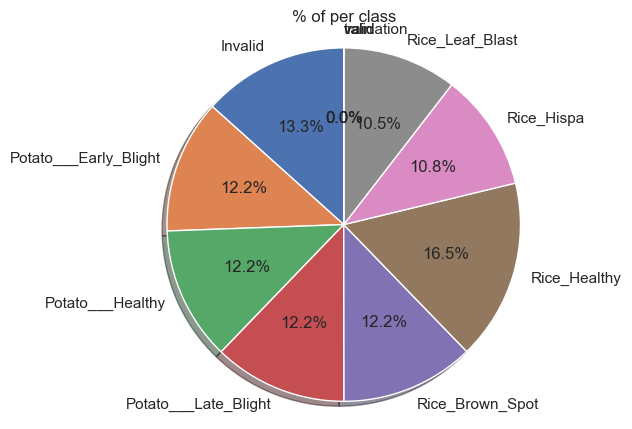

In [67]:
fig1, ax1 = plt.subplots()
ax1.pie(count_df.Count, labels=count_df.Category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of per class')
plt.show()

In [68]:
plant_df = pd.DataFrame({'Plants': ['Rice','Potato', 'Invalid'],
                   'total_image': [1022, 750,8]})
plant_df.set_index('Plants', inplace=True)
plant_df

total_image
Plants              
Rice            1022
Potato           750
Invalid            8

<Axes: title={'center': '% per plants'}, ylabel='total_image'>

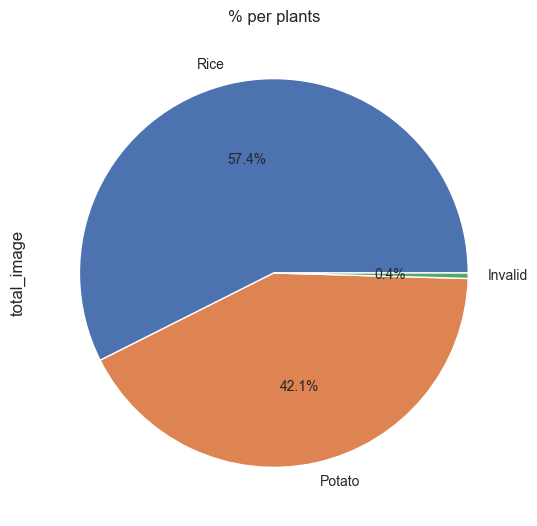

In [69]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plant_df.total_image.plot(kind='pie', ax=ax, startangle=0, fontsize=10, autopct='%1.1f%%', title='% per plants')

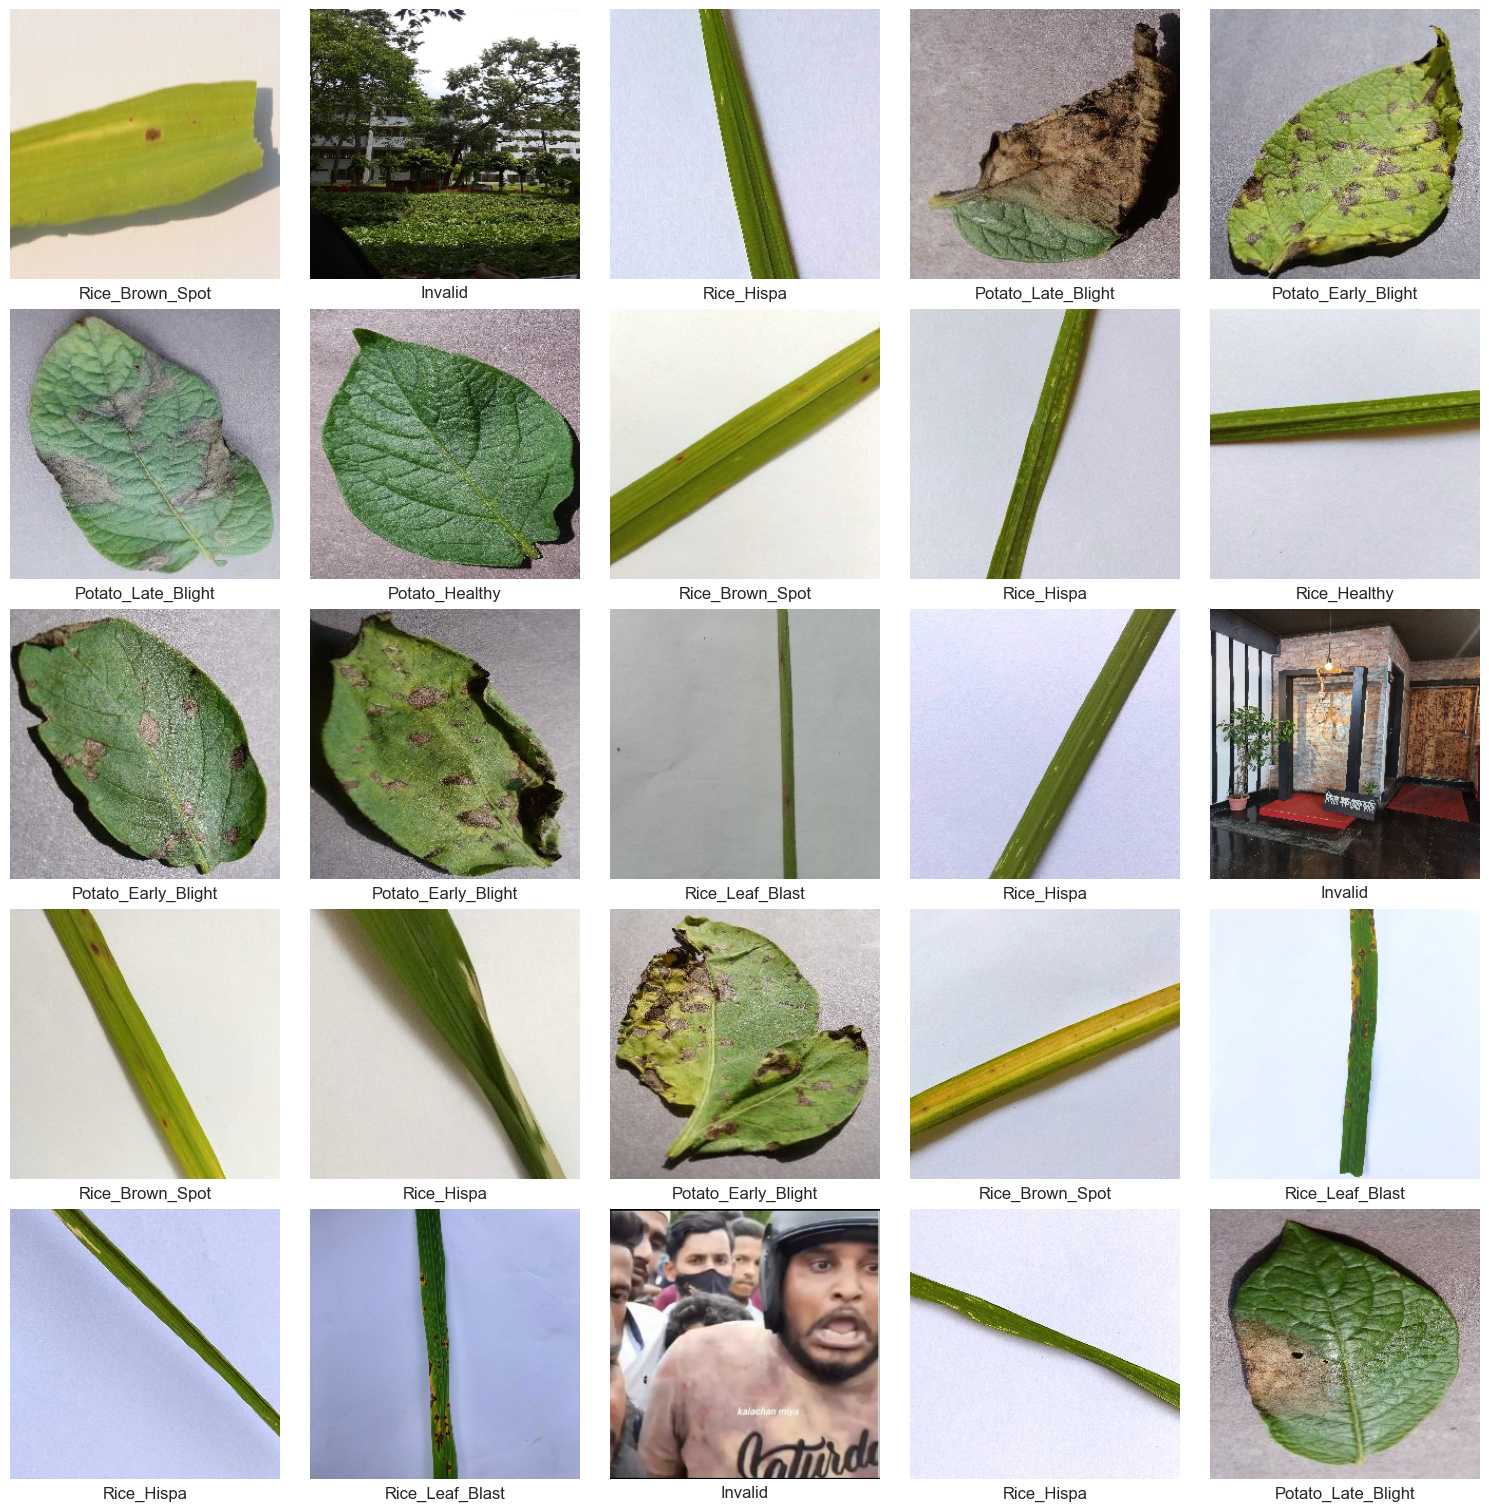

In [70]:
from re import sub

fig = plt.figure(figsize=(15, 15), constrained_layout=True)

for images, labels in dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = sub(r"[_]+","_",class_names[np.argmax(labels[i])])
        plt.title(title, y=-0.1)
        plt.axis("off")


In [71]:
from tensorflow.keras.optimizers import Adam

In [25]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
import itertools
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

ModuleNotFoundError: No module named 'sklearn'